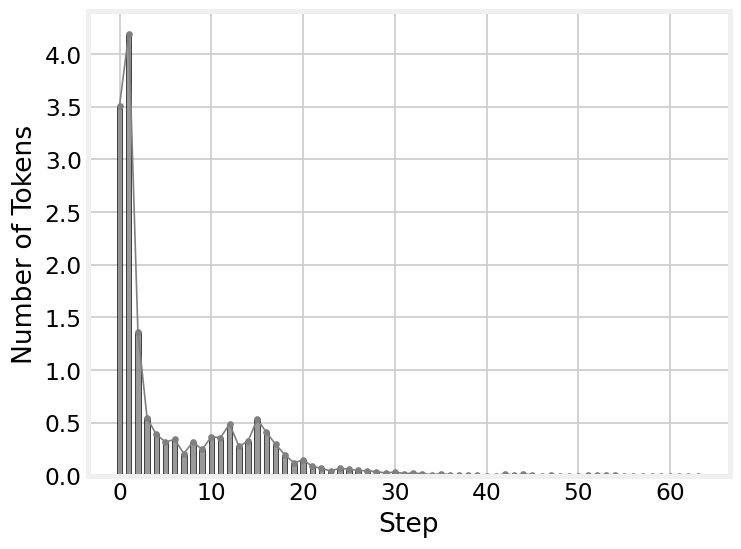

In [1]:
import matplotlib.pyplot as plt


with open("results/accelerate_token_num.txt") as f:
    token_num = [float(x) for x in f.readline().split(":")[-1].split()]

plt.figure(dpi=120)

x = range(64)
plt.style.use("fivethirtyeight")

plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"

bar_width = 0.6

plt.bar(x, token_num, width=bar_width, color="gray", alpha=0.8, edgecolor="black")
plt.plot(x, token_num, color="gray", marker=".", linewidth=1)

plt.xlabel("Step", fontsize=16)
plt.ylabel("Number of Tokens", fontsize=16)
plt.tight_layout()
plt.savefig("results/accelerate_token_num.pdf")
plt.show()



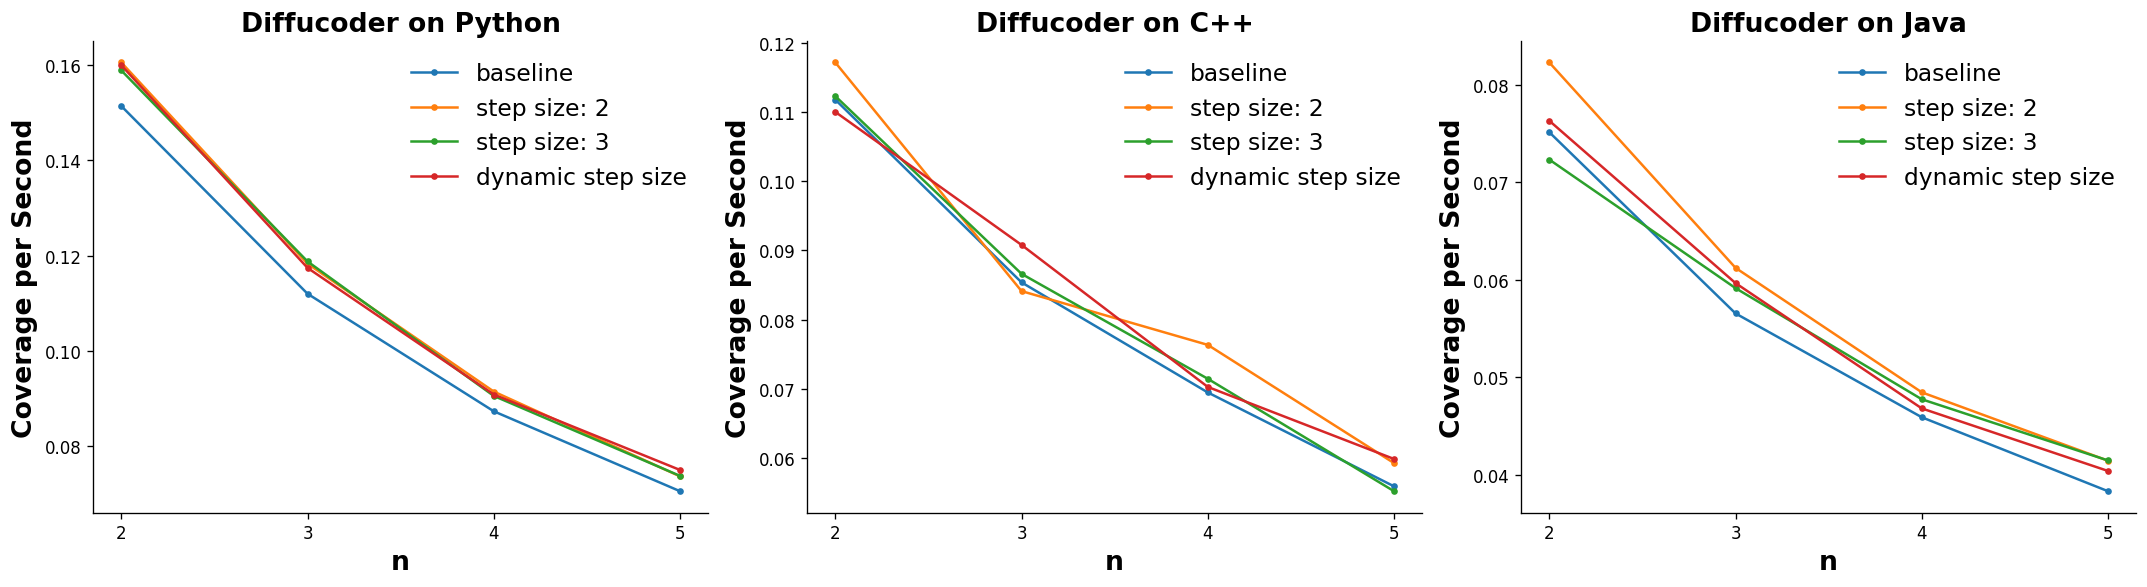

In [2]:
import matplotlib.pyplot as plt
import json

model = "diffucoder"
plt.style.use("default")
fig, axes = plt.subplots(1, 3, figsize=(18, 5), dpi=120)


with open(f"results/step_size.jsonl") as f:
    all_results = [json.loads(line) for line in f.readlines()]

for i, lang in enumerate(["python", "cpp", "java"]):
    lang_name = {
        "python": "Python",
        "java": "Java",
        "cpp": "C++"
    }[lang]
    ax = axes[i]
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(False)

    for step_size in ["1", "2", "3", "dyn"]:
        x, y = [], []
        for result in all_results:
            if result["step_size"] == step_size and result["language"] == lang:
                x.append(result["avg_time"])
                y.append(result["coverage"])
        y = [b / a for (a, b) in zip(x, y)]
        x = range(1, len(x) + 1)
        label = "baseline" if step_size == "1" else \
                "dynamic step size" if step_size == "dyn" else f"step size: {step_size}"
        ax.plot(x[1:], y[1:], marker='.', label=label)
    ax.set_xticks(range(2, len(x) + 1))
    ax.set_xlabel("n", fontsize=16, fontweight='semibold')
    ax.set_ylabel("Coverage per Second", fontsize=16, fontweight='semibold')
    ax.set_title(f"{model[0].upper() + model[1:]} on {lang_name}", fontsize=16, fontweight='semibold')
    ax.legend(loc="upper right", numpoints=1, fontsize=14, frameon=False)

plt.tight_layout()
plt.savefig("results/step_size.pdf")
plt.show()



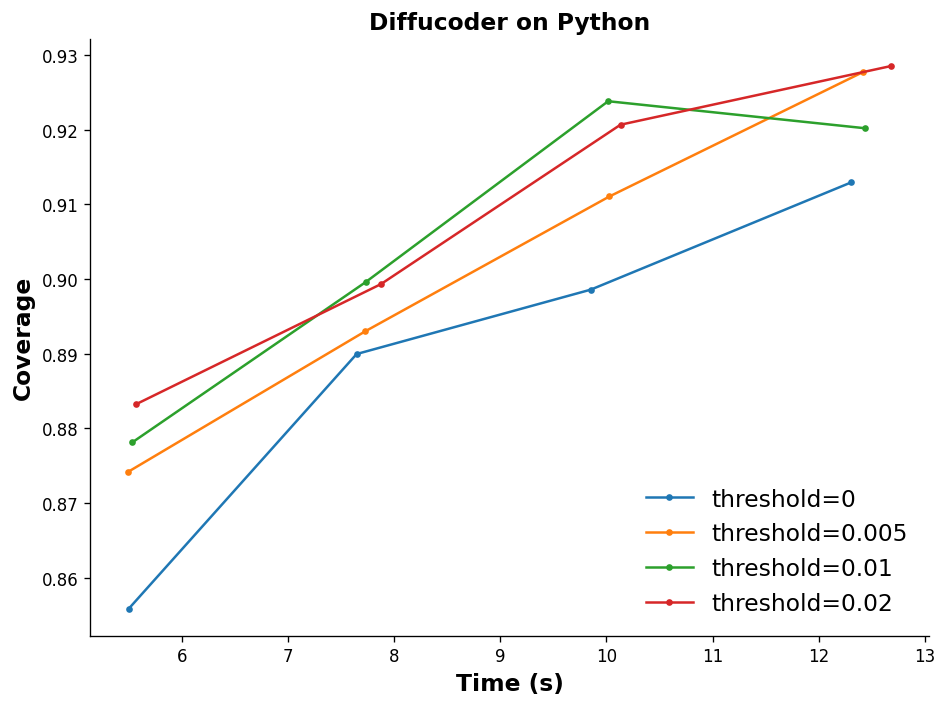

In [3]:
import matplotlib.pyplot as plt
import json

model = "diffucoder"
plt.figure(figsize=(8, 6), dpi=120)
plt.style.use("default")

ax = plt.gca()  # 获取当前坐标轴
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

with open(f"results/threshold.jsonl") as f:
    threshold_results = [json.loads(line) for line in f.readlines()]

for i, threshold in enumerate([0, 0.005, 0.01, 0.02]):
    results = threshold_results[i*5:(i+1)*5]
    x = [result["avg_time"] for result in results]
    y = [result["coverage"] for result in results]
    plt.plot(x[1:], y[1:], marker=".", label=f"threshold={threshold}")

plt.title("Diffucoder on Python", fontsize=14, fontweight='semibold')
plt.xlabel("Time (s)", fontsize=14, fontweight='semibold')
plt.ylabel("Coverage", fontsize=14, fontweight='semibold')
plt.legend(fontsize=14, loc='lower right', frameon=False)
plt.tight_layout()
plt.savefig("results/threshold.pdf")
plt.show()

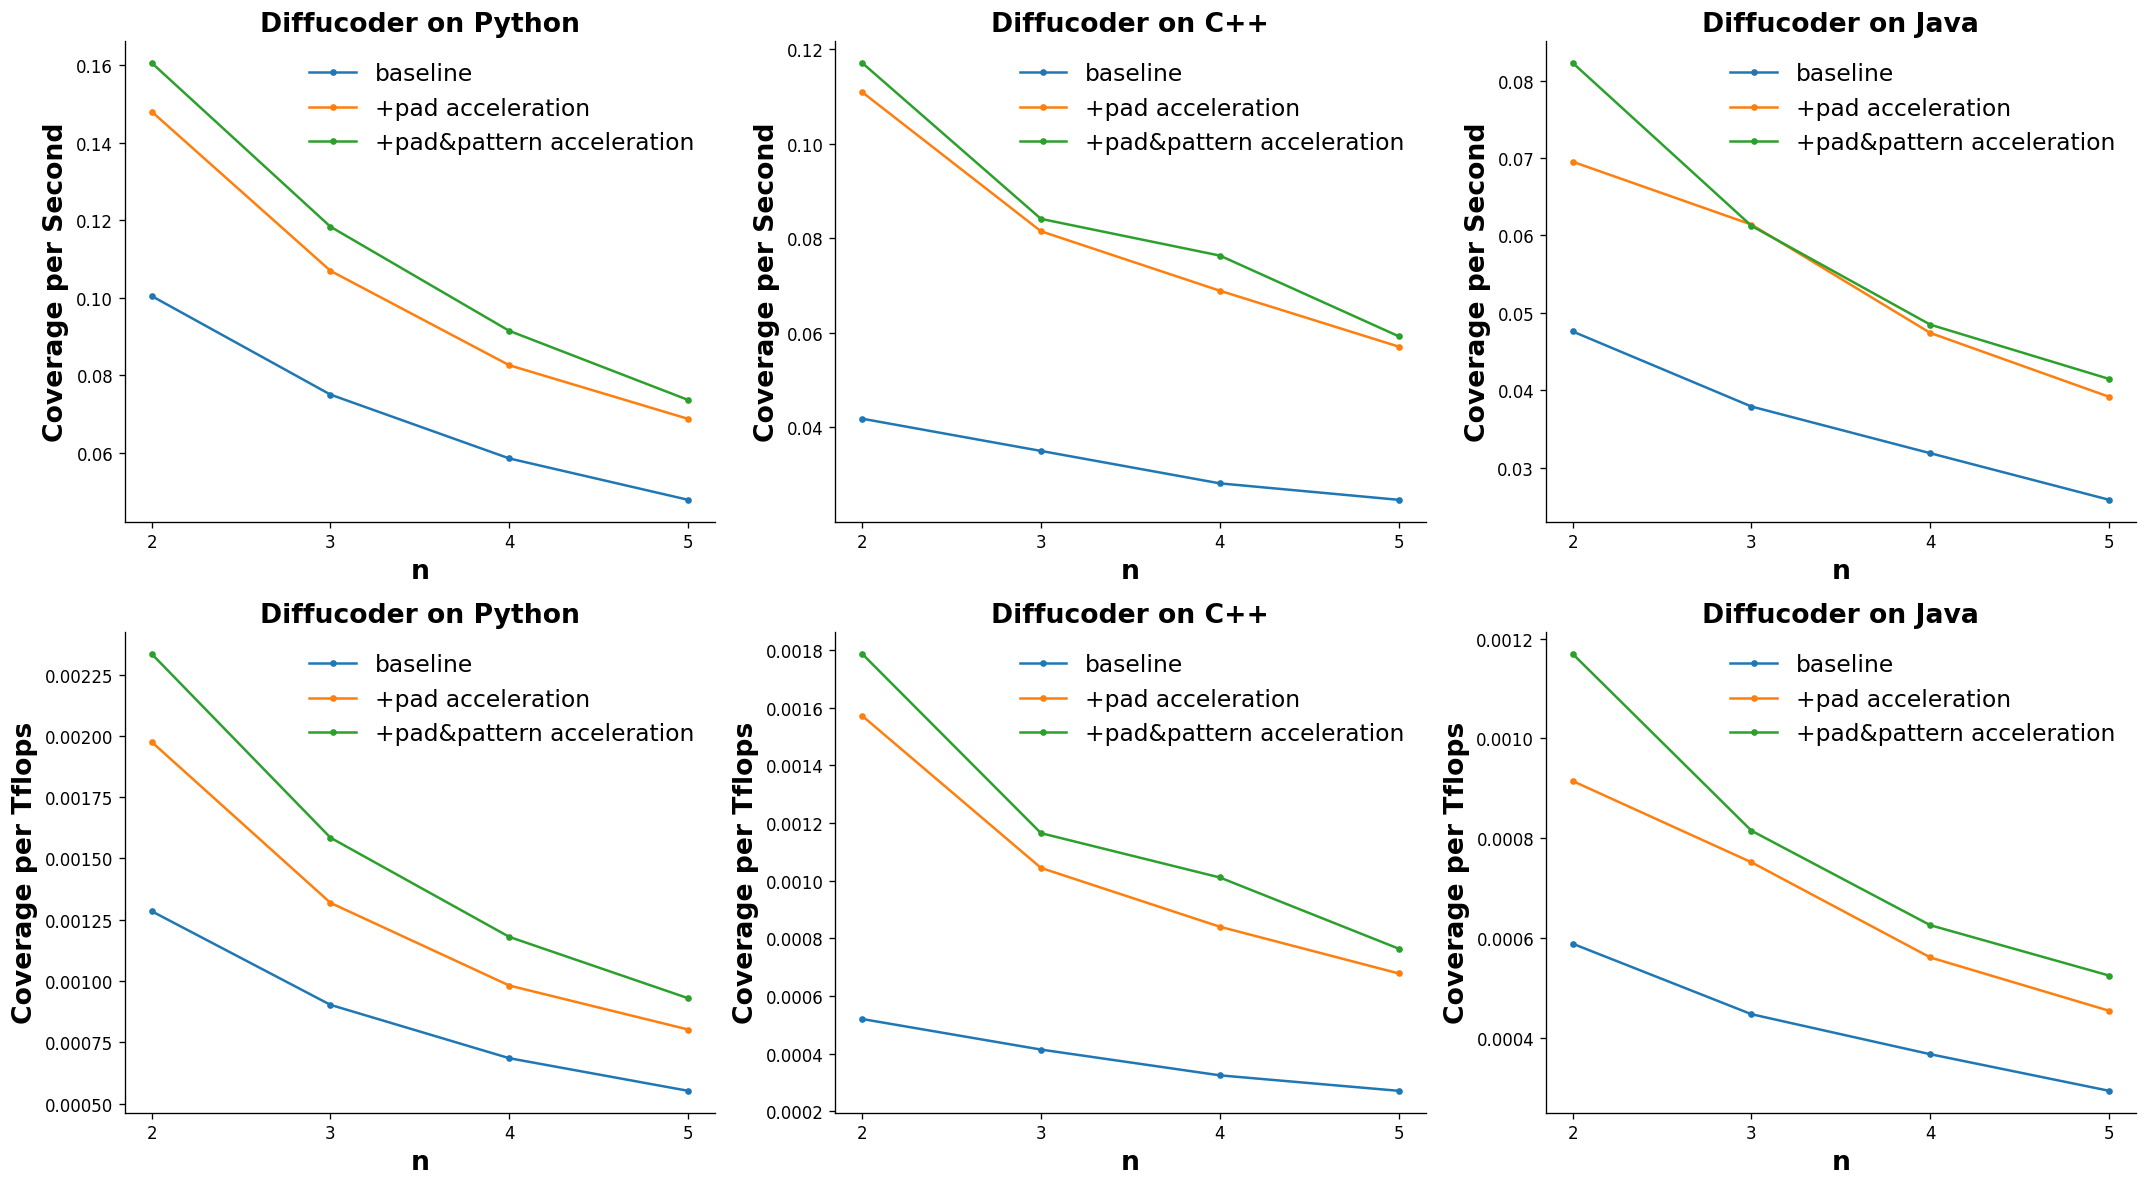

In [4]:
import matplotlib.pyplot as plt
import json

model = "diffucoder"
plt.style.use("default")
fig, axes = plt.subplots(2, 3, figsize=(18, 10), dpi=120)


with open(f"results/pad_accelerate.jsonl", "r") as f:
    pad_results = [json.loads(line) for line in f.readlines()]

with open(f"results/without_acceleration.jsonl", "r") as f:
    baseline_results = [json.loads(line) for line in f.readlines()]

with open(f"results/final.jsonl", "r") as f:
    final_results = [json.loads(line) for line in f.readlines()]

for i, metric in enumerate(["avg_time", "avg_tflops"]):
    for j, lang in enumerate(["python", "cpp", "java"]):
        lang_name = {
            "python": "Python",
            "java": "Java",
            "cpp": "C++"
        }[lang]
        ax = axes[i][j]
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.grid(False)

        x, y = [], []
        for result in baseline_results:
            if result["model"] == model and result["language"] == lang:
                x.append(result[metric])
                y.append(result["coverage"])
        ax.plot(range(2, 6), [b / a for a, b in zip(x[1:5], y[1:5])], marker='.', label="baseline")

        x, y = [], []
        for result in pad_results:
            if result["model"] == model and result["language"] == lang:
                x.append(result[metric])
                y.append(result["coverage"])
        ax.plot(range(2, 6), [b / a for a, b in zip(x[1:5], y[1:5])], marker='.', label="+pad acceleration")

        x, y = [], []
        for result in final_results:
            if result["model"] == model and result["language"] == lang:
                x.append(result[metric])
                y.append(result["coverage"])
        ax.plot(range(2, 6), [b / a for a, b in zip(x[1:5], y[1:5])], marker='.', label="+pad&pattern acceleration")
        ax.set_xticks(range(2, 6))
        ax.set_xlabel("n", fontsize=16, fontweight='semibold')
        ylabel = "Coverage per Second" if metric == "avg_time" else "Coverage per Tflops"
        ax.set_ylabel(ylabel, fontsize=16, fontweight='semibold')
        ax.set_title(f"{model[0].upper() + model[1:]} on {lang_name}", fontsize=16, fontweight='semibold')
        ax.legend(loc="upper right", numpoints=1, fontsize=14, frameon=False)

plt.tight_layout()
plt.savefig("results/pad_accelerate.pdf")
plt.show()



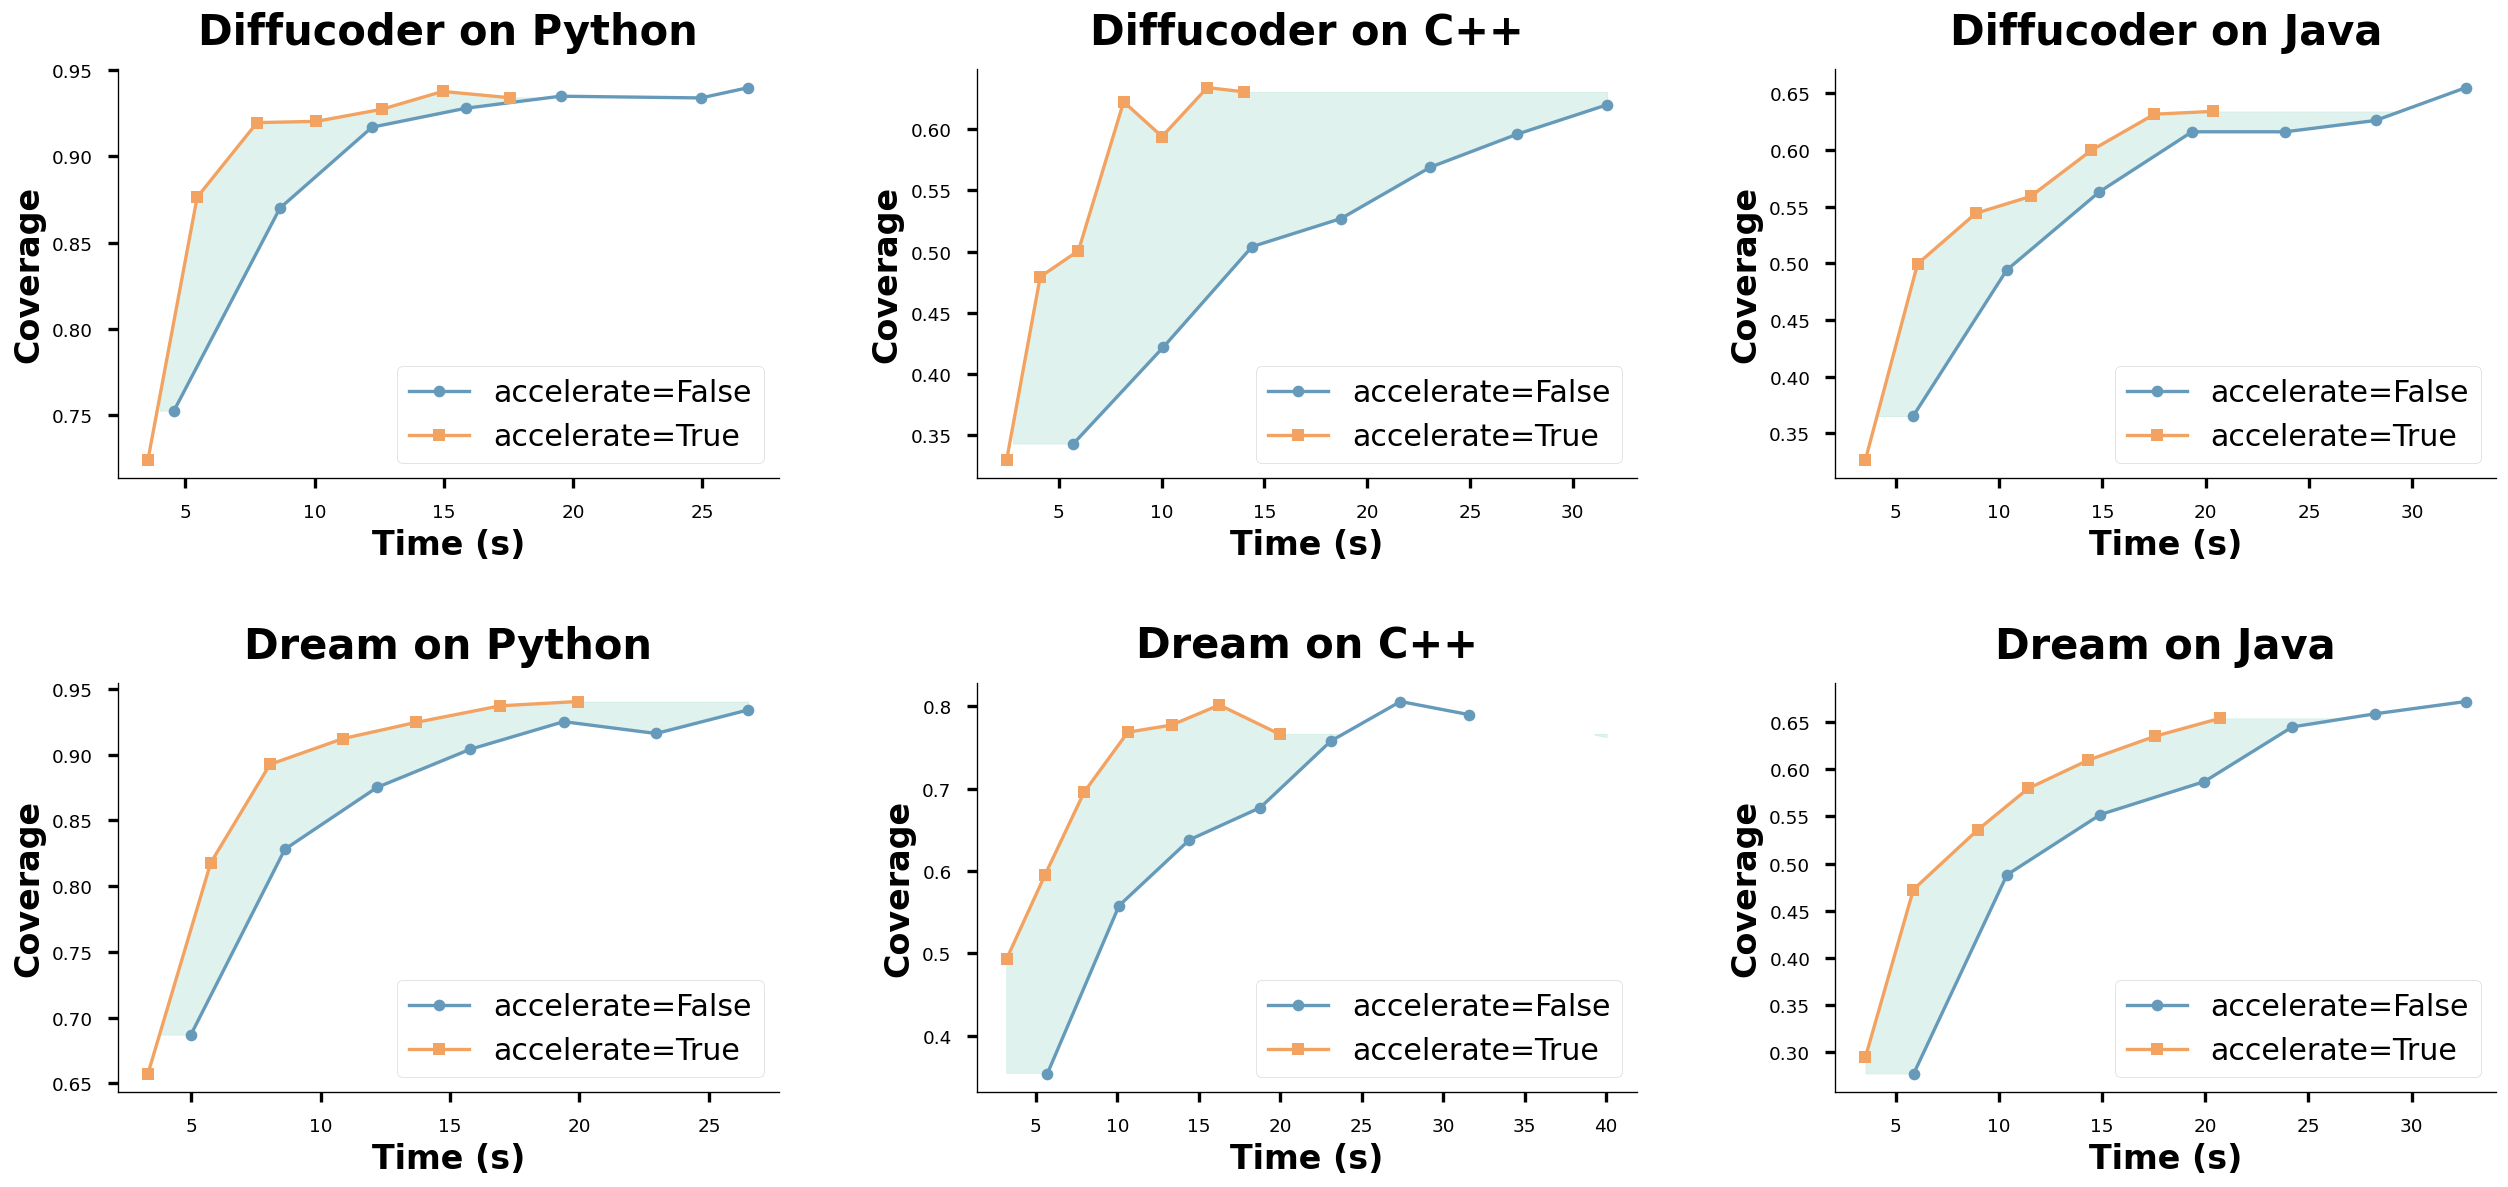

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import json

plt.style.use('seaborn-v0_8-talk')

models = ["diffucoder", "dream"]
languages = ["python", "cpp", "java"]

fig, axes = plt.subplots(len(models), len(languages), figsize=(7 * len(languages), 5 * len(models)), dpi=120)

with open("results/without_acceleration.jsonl", "r") as f:
    baseline_results = [json.loads(line) for line in f.readlines()]

with open("results/final.jsonl", "r") as f:
    final_results = [json.loads(line) for line in f.readlines()]

for i, model in enumerate(models):
    for j, lang in enumerate(languages):
        lang_name = {
            "python": "Python",
            "java": "Java",
            "cpp": "C++"
        }[lang]
        ax = axes[i][j]

        wo_time, wo_cov = [], []
        for result in baseline_results:
            if result["model"] == model and result["language"] == lang:
                wo_time.append(result["avg_time"])
                wo_cov.append(result["coverage"])

        w_time, w_cov = [], []
        for result in final_results:
            if result["model"] == model and result["language"] == lang:
                w_time.append(result["avg_time"])
                w_cov.append(result["coverage"])

        ax.plot(wo_time[:7], wo_cov[:7], marker='o', linestyle='-', color="#669aba",
                linewidth=2, markersize=7, label='accelerate=False')
        ax.plot(w_time[:7], w_cov[:7], marker='s', linestyle='-', color="#f3a361",
                linewidth=2, markersize=7, label='accelerate=True')

        ax.set_title(f"{model[0].upper() + model[1:]} on {lang_name}", fontsize=25, fontweight='bold', pad=15)
        ax.set_xlabel("Time (s)", fontsize=20, fontweight='bold')
        ax.set_ylabel("Coverage", fontsize=20, fontweight='bold')

        ax.tick_params(axis='both', which='major', labelsize=40, width=2, length=6)

        for label in ax.get_xticklabels():
            label.set_fontweight('normal')
        for label in ax.get_yticklabels():
            label.set_fontweight('normal')

        common_time = np.linspace(min(min(wo_time), min(w_time)), max(max(wo_time), max(w_time)), 100)

        wo_cov_interp = np.interp(common_time, wo_time, wo_cov)
        w_cov_interp = np.interp(common_time, w_time, w_cov)
        ax.fill_between(common_time, wo_cov_interp, w_cov_interp, 
                        where=(wo_cov_interp <= w_cov_interp), 
                        color="#66c2a5", alpha=0.2)

        ax.tick_params(axis='both', which='major', labelsize=11)
        # ax.set_xlim(0, 40)

        #Diffucoder Python
        # ax.set_ylim(0.3, 0.65)
        #Diffucoder C++
        #ax.set_ylim(0.3, 0.68)
        #Dream Python
        #ax.set_ylim(0.6, 0.96)
        #Dream C++
        # ax.set_ylim(0.25, 0.7)

        ax.legend(fontsize=18, loc='lower right', frameon=True)

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.savefig("results/main_results.pdf")
plt.show()

In [6]:
import json

with open("results/without_acceleration.jsonl", "r") as f:
    baseline_results = [json.loads(line) for line in f.readlines()]

with open("results/final.jsonl", "r") as f:
    final_results = [json.loads(line) for line in f.readlines()]

def results_latex(model, language):
    model_name = model[0].upper() + model[1:]
    latex = r"\midrule" + "\n"
    latex += r"\multirow{3}{*}{\textbf{" + model_name + r"}}" + "\n"
    results = {}
    for result in baseline_results:
        if result["language"] == language and result["model"] == model:
            n = result["n"]
            results[n] = [result["avg_tflops"], result["avg_time"], result["tps"]]
    baseline_list = results[3] + results[5] + results[7]

    results = {}
    for result in final_results:
        if result["language"] == language and result["model"] == model:
            n = result["n"]
            results[n] = [result["avg_tflops"], result["avg_time"], result["tps"]]
    final_list = results[3] + results[5] + results[7]

    speedup_list = [round(x / y, 2) if x >= y else round(y / x, 2) for x, y in zip(baseline_list, final_list)]

    latex += r"& baseline " + " ".join([f"& {round(x, 2)}" for x in baseline_list]) + r" \\" + "\n"
    latex += r"&\cellcolor{myblue} ours    " + " ".join([r"& \cellcolor{myblue}" + str(round(x, 2)) for x in final_list]) + r" \\" + "\n"
    latex += "& speedup             " + " ".join([r"& \textcolor{myred}{\textbf{$\times" + str(x) + "$}}" for x in speedup_list]) + r" \\" + "\n"
    return latex

languages = ["python", "cpp", "java"]
for language in languages:
    latex = f"%%%%%%%%%%%% 结果表-{language} %%%%%%%%%%%%%\n"
    latex += r"""\begin{table}[h]
\centering
{\Huge 
\renewcommand{\arraystretch}{1.25}
\setlength{\tabcolsep}{7pt}
\resizebox{\textwidth}{!}{%
\begin{tabular}{lcccccccccc}
\specialrule{3pt}{0pt}{1pt} % 顶部加粗横线
\multirow{2}{*}{\textbf{Model}} & & \multicolumn{3}{c}{\textbf{n=3}} & \multicolumn{3}{c}{\textbf{n=5}} & \multicolumn{3}{c}{\textbf{n=7}} \\
\cmidrule(lr){3-5} \cmidrule(lr){6-8} \cmidrule(lr){9-11}
& & \shortstack{\textbf{computational}\\\textbf{cost (tflops)}} & \textbf{time (s)} & \shortstack{\textbf{throughput}\\\textbf{(tps)}} & \shortstack{\textbf{computational}\\\textbf{cost (tflops)}} & \textbf{time (s)} & \shortstack{\textbf{throughput}\\\textbf{(tps)}} & \shortstack{\textbf{computational}\\\textbf{cost (tflops)}} & \textbf{time (s)} & \shortstack{\textbf{throughput}\\\textbf{(tps)}} \\
"""
    latex += results_latex("diffucoder", language)
    latex += r"\addlinespace[2pt]" + "\n\n"
    latex += results_latex("dream", language)
    latex += r"""\specialrule{3pt}{1pt}{0pt} % 底部加粗横线
\end{tabular}%
}
}
\caption{\textbf{"""
    latex += {
        "python": "Python",
        "java": "Java",
        "cpp": "C++"
    }[language]
    latex += "} Performance of Diffucoder and Dream models with and without acceleration.}\n" + r"\label{" + language + "_table}\n" + r"\end{table}"
    print(latex)

%%%%%%%%%%%% 结果表-python %%%%%%%%%%%%%
\begin{table}[h]
\centering
{\Huge 
\renewcommand{\arraystretch}{1.25}
\setlength{\tabcolsep}{7pt}
\resizebox{\textwidth}{!}{%
\begin{tabular}{lcccccccccc}
\specialrule{3pt}{0pt}{1pt} % 顶部加粗横线
\multirow{2}{*}{\textbf{Model}} & & \multicolumn{3}{c}{\textbf{n=3}} & \multicolumn{3}{c}{\textbf{n=5}} & \multicolumn{3}{c}{\textbf{n=7}} \\
\cmidrule(lr){3-5} \cmidrule(lr){6-8} \cmidrule(lr){9-11}
& & \shortstack{\textbf{computational}\\\textbf{cost (tflops)}} & \textbf{time (s)} & \shortstack{\textbf{throughput}\\\textbf{(tps)}} & \shortstack{\textbf{computational}\\\textbf{cost (tflops)}} & \textbf{time (s)} & \shortstack{\textbf{throughput}\\\textbf{(tps)}} & \shortstack{\textbf{computational}\\\textbf{cost (tflops)}} & \textbf{time (s)} & \shortstack{\textbf{throughput}\\\textbf{(tps)}} \\
\midrule
\multirow{3}{*}{\textbf{Diffucoder}}
& baseline & 1015.59 & 12.22 & 16.97 & 1692.65 & 19.51 & 17.69 & 2369.72 & 26.78 & 18.09 \\
&\cellcolor{myblue} ours   

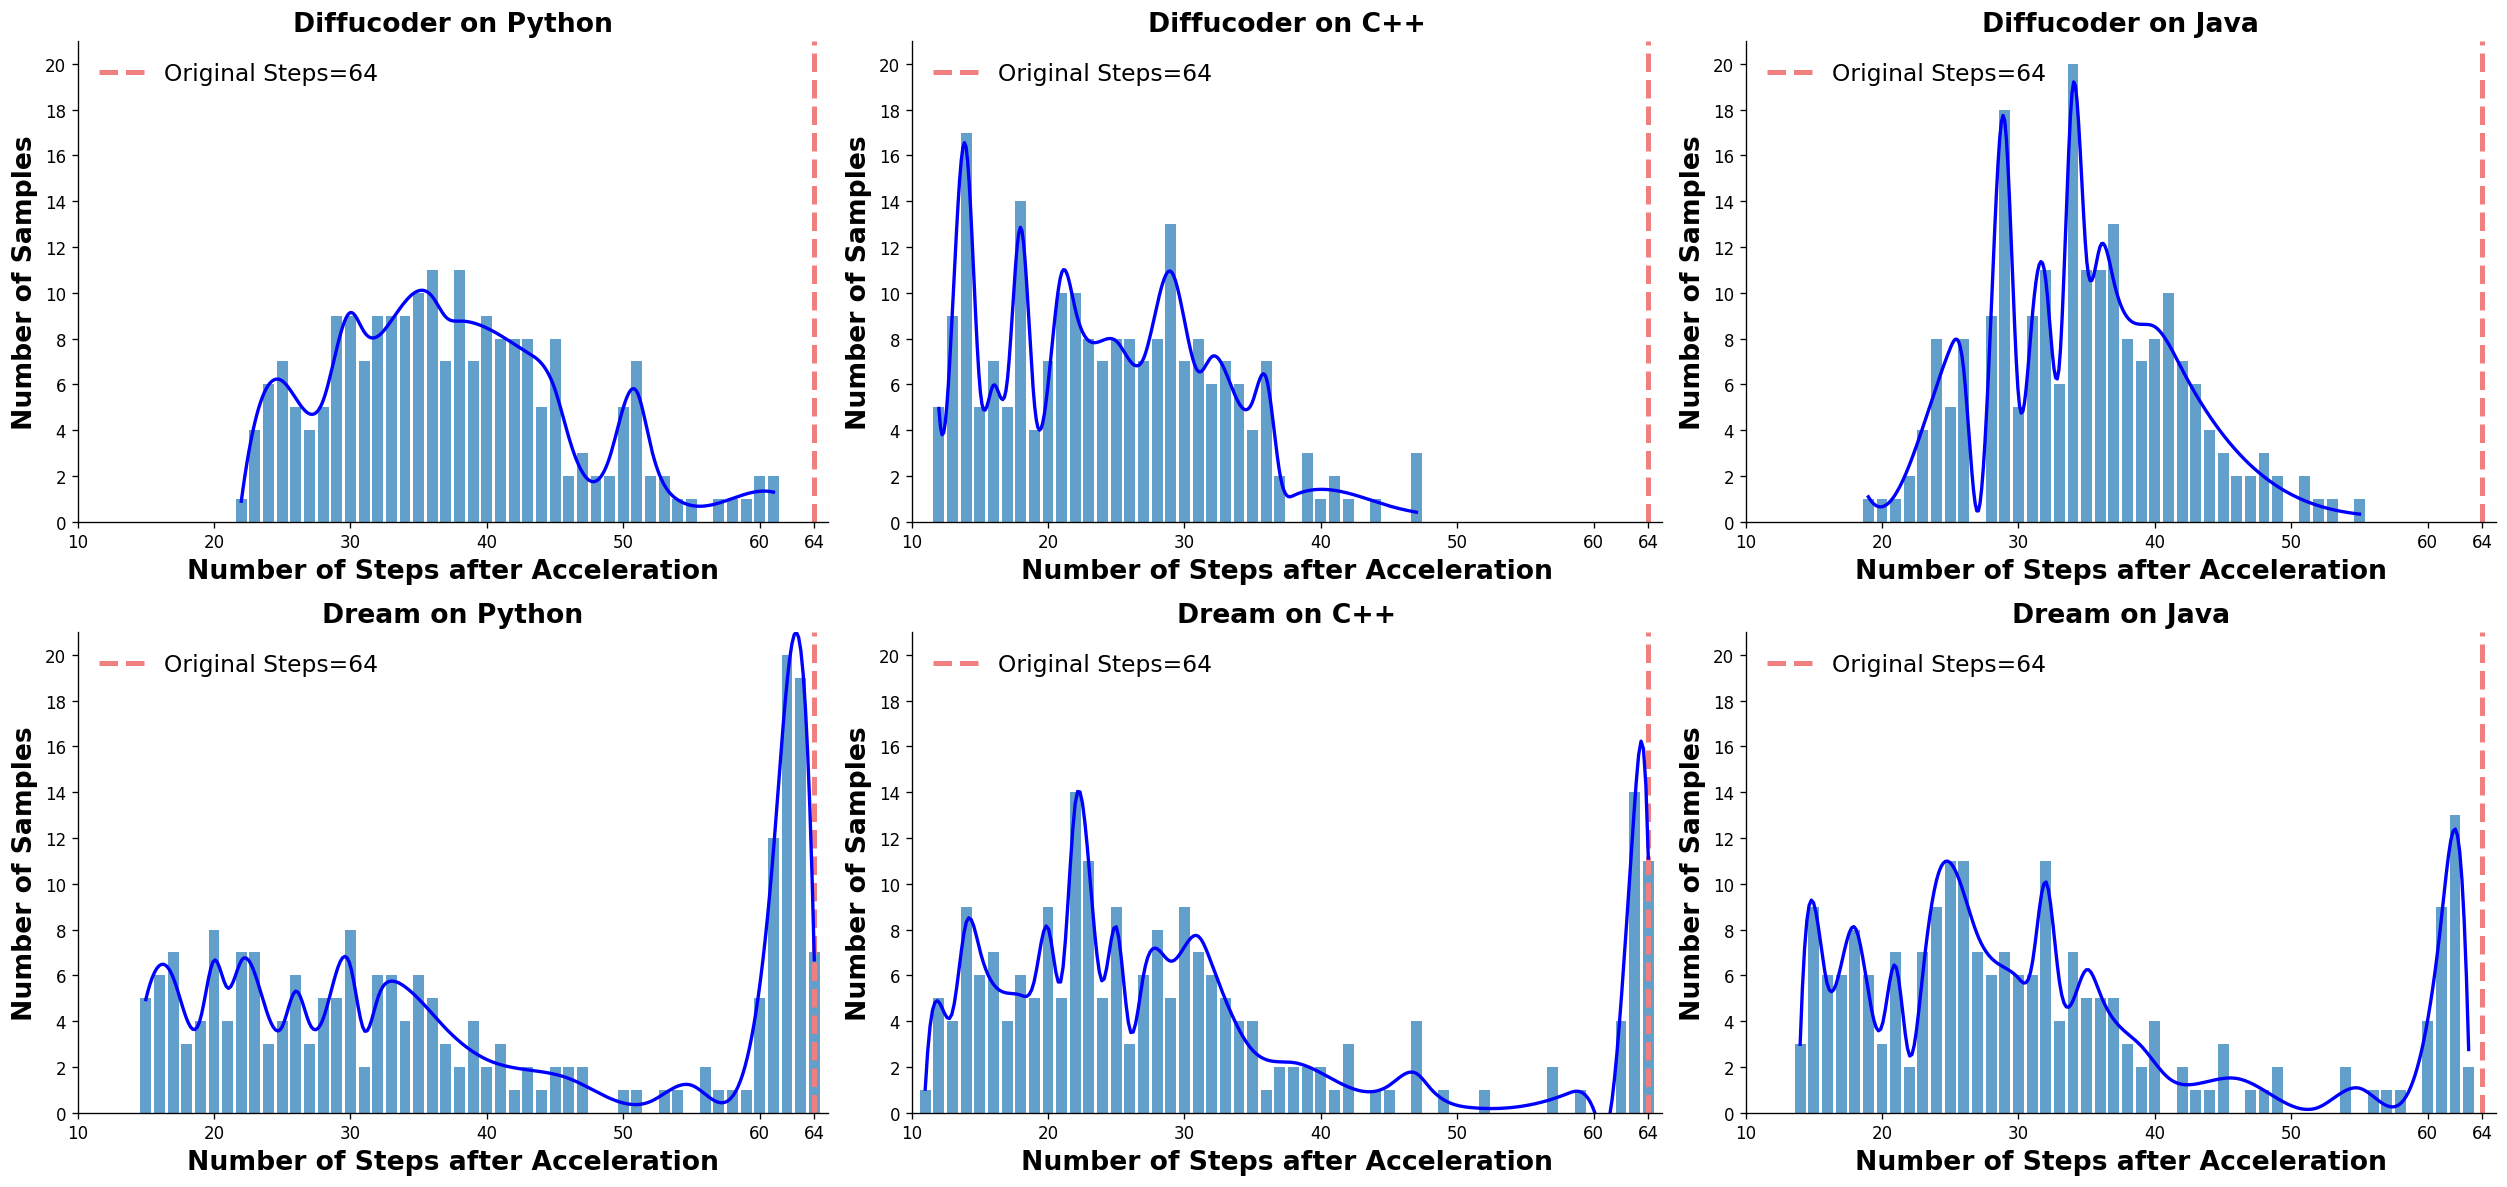

In [7]:
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt
import numpy as np
from scipy.interpolate import UnivariateSpline

plt.style.use("default")

models = ["diffucoder", "dream"]
languages = ["python", "cpp", "java"]

fig, axes = plt.subplots(len(models), len(languages), figsize=(7 * len(languages), 5 * len(models)), dpi=120)

df = pd.read_parquet("results/samples.parquet")
for i, model in enumerate(models):
    for j, lang in enumerate(languages):
        lang_name = {
            "python": "Python",
            "java": "Java",
            "cpp": "C++"
        }[lang]
        ax = axes[i][j]
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.grid(False)

        sub_df = df[(df["model"] == model) & (df["lang"] == lang)]
        counts = Counter(sub_df["steps"].values)
        x_min = sub_df["steps"].min()
        x_max = sub_df["steps"].max()
        x = list(range(x_min, 65))
        y = [counts.get(i, 0) for i in x]
        ax.set_xlim(10, 65)
        ax.set_ylim(0, 21)
        ax.bar(x, y, alpha=0.7)
        ax.axvline(x=64, color="lightcoral", linestyle="--", linewidth=3, label="Original Steps=64")

        spline = UnivariateSpline(x, y, s=40)  # s 控制平滑度，越大越平滑
        x_smooth = np.linspace(x_min, x_max, 300)
        y_smooth = spline(x_smooth)
        ax.plot(x_smooth, y_smooth, color="blue", linewidth=2)

        ax.set_xticks(list(range(10, 65, 10)) + [64])
        ax.set_yticks(list(range(0, 21, 2)))
        ax.set_title(f"{model[0].upper() + model[1:]} on {lang_name}", fontsize=16, fontweight='semibold')
        ax.set_xlabel("Number of Steps after Acceleration", fontsize=16, fontweight='semibold')
        ax.set_ylabel("Number of Samples", fontsize=16, fontweight='semibold')
        ax.legend(fontsize=14, loc='upper left', frameon=False)

plt.tight_layout()
plt.savefig("results/case_distribution.pdf")
plt.show()


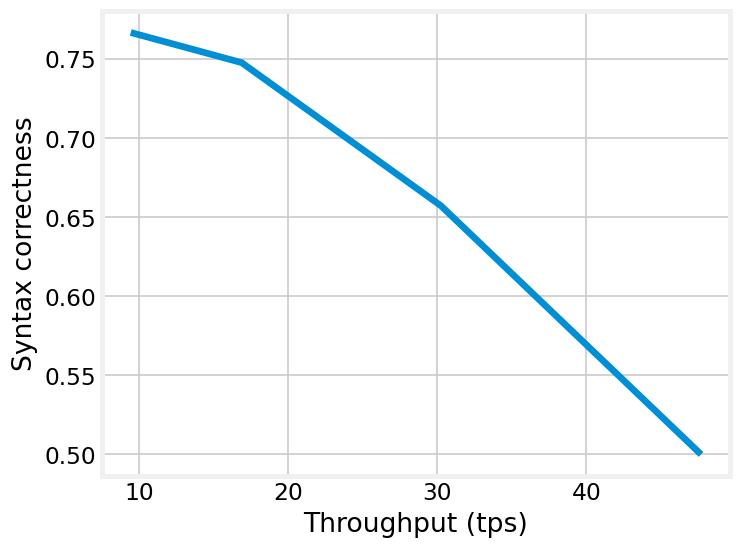

In [8]:
import matplotlib.pyplot as plt
import json

model = "diffucoder"
language = "cpp"
plt.figure(dpi=120)
plt.style.use("fivethirtyeight")

plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"

with open(f"results/different_step.jsonl") as f:
    step_results = [json.loads(line) for line in f.readlines()]

tps = [item["tps"] for item in step_results]
corr = [item["correctness"] for item in step_results]

plt.plot(tps, corr)

plt.xlabel("Throughput (tps)", fontsize=16)
plt.ylabel("Syntax correctness", fontsize=16)
plt.tight_layout()
plt.savefig("results/different_step.pdf")
plt.show()